In [318]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset/bmi_data_lab3.csv')
df.isna().sum() #Check null value
df.describe() # show data briefly

,Age,Height (Inches),Weight (Pounds),BMI
count,150.000000,146.000000,150.000000,145.000000
mean,26.413333,80.133994,129.703405,2.751724
std,5.206071,96.579662,88.179891,0.449244
min,18.000000,-130.926162,-161.994913,1.000000
25%,22.000000,66.599598,120.391125,3.000000
50%,26.500000,68.219095,128.538050,3.000000
75%,31.000000,69.432848,136.170900,3.000000
max,35.000000,665.465059,1110.621115,3.000000


In [319]:
height_outlier = (60 > df["Height (Inches)"]) | (df["Height (Inches)"] > 75) #data preprocessing
weight_outlier = (90 > df["Weight (Pounds)"]) | (df["Weight (Pounds)"] > 220)

df.loc[height_outlier, "Height (Inches)"] = np.nan #replace outlier data to np.Nan
df.loc[weight_outlier, "Weight (Pounds)"] = np.nan #replace outlier data to np.nan
df.isna().sum()

Sex                 0
Age                 0
Height (Inches)    12
Weight (Pounds)     4
BMI                 5
dtype: int64

In [6]:
def modeling(raw_data): #find linear regression model my sklearn
    temp_df = pd.concat([raw_data["Height (Inches)"], raw_data["Weight (Pounds)"]], axis=1)

    dataset = temp_df.dropna(axis=0)

    if dataset.shape[0] == 1: #return None if there is no element to delete
        return None, None

    outlier_X = dataset["Height (Inches)"].values
    outlier_y = dataset["Weight (Pounds)"].values

    weight_inference_model = LinearRegression()
    weight_inference_model.fit(outlier_X.reshape(-1, 1), outlier_y)

    height_inference_model = LinearRegression()
    height_inference_model.fit(outlier_y.reshape(-1, 1), outlier_X)

    return weight_inference_model, height_inference_model #return weight, height model both

In [7]:
def fetch(row, height_model, weight_model): #replace nan data to value that found by linear regression
    if np.isnan(row["Height (Inches)"]):
        inf = height_model.predict([[row["Weight (Pounds)"]]])
        row["Height (Inches)"] = inf[-1] #array flatten

    if np.isnan(row["Weight (Pounds)"]):
        inf = weight_model.predict([[row["Height (Inches)"]]])
        row["Weight (Pounds)"] = inf[-1] #array faltten

    return row

In [297]:
wm, hm = modeling(df) #find linear regression model
clean_dataset = df.apply(lambda x: fetch(x, hm, wm), axis=1) #apply fetch function
clean_dataset.describe() #data describe

,Age,Height (Inches),Weight (Pounds),BMI
count,150.000000,150.000000,150.000000,145.000000
mean,26.413333,68.061833,127.729014,2.751724
std,5.206071,1.825019,11.712928,0.449244
min,18.000000,63.425770,97.901910,1.000000
25%,22.000000,67.032593,120.846000,3.000000
50%,26.500000,68.219095,128.643600,3.000000
75%,31.000000,69.204072,136.038550,3.000000
max,35.000000,73.901070,155.898700,3.000000


In [281]:
groupby_gender_female = df[df['Sex']== 'Female'] #find group which name is Female in column 'Sex'
groupby_gender_female.describe()

,Age,Height (Inches),Weight (Pounds),BMI
count,86.000000,80.000000,83.000000,85.000000
mean,26.965116,67.989207,126.635778,2.729412
std,5.109271,1.945817,12.380209,0.472789
min,18.000000,63.425770,97.901910,1.000000
25%,23.000000,66.779815,119.625250,2.000000
50%,27.000000,68.232355,128.074200,3.000000
75%,31.000000,69.151602,134.737750,3.000000
max,35.000000,73.901070,155.898700,3.000000


In [282]:
wm, hm = modeling(groupby_gender_female)
clean_dataset_female = groupby_gender_female.apply(lambda x: fetch(x, hm, wm), axis=1) #apply fetch function
clean_dataset_female.describe()

,Age,Height (Inches),Weight (Pounds),BMI
count,86.000000,86.000000,86.000000,85.000000
mean,26.965116,68.033336,126.549222,2.729412
std,5.109271,1.889659,12.290378,0.472789
min,18.000000,63.425770,97.901910,1.000000
25%,23.000000,66.855897,119.497675,2.000000
50%,27.000000,68.253645,127.829400,3.000000
75%,31.000000,69.126968,134.704240,3.000000
max,35.000000,73.901070,155.898700,3.000000


In [283]:
groupby_gender_male = df[df['Sex']== 'Male'] #find group which name ius Male in column 'Sex
groupby_gender_male.describe()

,Age,Height (Inches),Weight (Pounds),BMI
count,64.000000,58.000000,63.000000,60.000000
mean,25.671875,68.123231,129.173638,2.783333
std,5.282660,1.832090,10.905599,0.415450
min,18.000000,63.836240,102.835100,2.000000
25%,21.000000,66.933840,122.492900,3.000000
50%,25.000000,68.217640,130.353000,3.000000
75%,30.000000,69.704138,136.342400,3.000000
max,35.000000,71.230330,155.376700,3.000000


In [284]:
groupby_gender_male.describe()
wm, hm = modeling(groupby_gender_male)
clean_dataset_male = groupby_gender_male.apply(lambda x: fetch(x, hm, wm), axis=1) # apply fetch function
clean_dataset_male.describe() #show data briefly



,Age,Height (Inches),Weight (Pounds),BMI
count,64.000000,64.000000,64.000000,60.000000
mean,25.671875,68.100940,129.261595,2.783333
std,5.282660,1.752255,10.841559,0.415450
min,18.000000,63.836240,102.835100,2.000000
25%,21.000000,67.081454,122.508450,3.000000
50%,25.000000,68.118900,130.377600,3.000000
75%,30.000000,69.553500,136.282450,3.000000
max,35.000000,71.230330,155.376700,3.000000


In [285]:
for bmi in range(1, 3 + 1):
    original_bmi = df[df["BMI"] == bmi] #find BMI group 1 through 3
    print(original_bmi.describe())
    groupby_bmi = original_bmi.dropna(axis=0) #drop np.nan element
    wm, hm = modeling(groupby_bmi)

    if wm != None: #if there is something to replace
        test = original_bmi.apply(lambda x: fetch(x, hm, wm), axis=1)
        print(test.describe())

    else: #if there is no element to replace then just print it
        print(original_bmi.describe())

        Age  Height (Inches)  Weight (Pounds)  BMI
count   1.0           1.0000           1.0000  1.0
mean   25.0          69.5233         103.3016  1.0
std     NaN              NaN              NaN  NaN
min    25.0          69.5233         103.3016  1.0
25%    25.0          69.5233         103.3016  1.0
50%    25.0          69.5233         103.3016  1.0
75%    25.0          69.5233         103.3016  1.0
max    25.0          69.5233         103.3016  1.0
        Age  Height (Inches)  Weight (Pounds)  BMI
count   1.0           1.0000           1.0000  1.0
mean   25.0          69.5233         103.3016  1.0
std     NaN              NaN              NaN  NaN
min    25.0          69.5233         103.3016  1.0
25%    25.0          69.5233         103.3016  1.0
50%    25.0          69.5233         103.3016  1.0
75%    25.0          69.5233         103.3016  1.0
max    25.0          69.5233         103.3016  1.0
             Age  Height (Inches)  Weight (Pounds)   BMI
count  34.000000        3

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

data=pd.read_csv("../dataset/bmi_data_lab3.csv")


outlier=data[ (data['Weight (Pounds)'] < 0) | (data['Weight (Pounds)'] > 200) | (data['Weight (Pounds)']==0) | (data['Height (Inches)'] < 0) | (data['Height (Inches)'] > 100) | (data['Height (Inches)']==0) |  (data['Height (Inches)'].isna())]

data=data[ (data['Height (Inches)'] > 60) & (data['Height (Inches)'] < 75) & (data['Height (Inches)'] != 0 ) &  (data['Weight (Pounds)']!=np.nan) & (data['Weight (Pounds)'] > 90 ) & (data['Weight (Pounds)'] < 220) & (data['Weight (Pounds)']!=0) &  (data['Height (Inches)']!=np.nan)]

In [9]:
reg_Y = linear_model.LinearRegression() # linear regression for Height
reg_Y = reg_Y.fit(data.iloc[ :,2:3], data.iloc[ :,3:4])

reg_X = linear_model.LinearRegression() #Linear regression for Weight
reg_X = reg_X.fit(data.iloc[:, 3:4], data.iloc[:, 2:3])

px = np.array([(data.iloc[ :,2:3].min()-1) , (data.iloc[ :,2:3].max()+1)]) #Height domain
py = reg_Y.predict(px)

px_height = np.array([(data.iloc[ :,3:4].min()-1) , (data.iloc[ :,3:4].max()+1)]) #Weight domain
py_height = reg_X.predict(px_height)

/opt/homebrew/Caskroom/miniforge/base/envs/RL_Sutton/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/RL_Sutton/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
height_outlier = (60 > outlier["Height (Inches)"]) | (outlier["Height (Inches)"] > 75) #data preprocessing
weight_outlier = (90 > outlier["Weight (Pounds)"]) | (outlier["Weight (Pounds)"] > 220)

outlier.loc[height_outlier, "Height (Inches)"] = np.nan #replace outlier data to np.Nan
outlier.loc[weight_outlier, "Weight (Pounds)"] = np.nan #repl

outlier

,Sex,Age,Height (Inches),Weight (Pounds),BMI
1,Female,35,NaN,136.4873,3.0
9,Male,25,NaN,120.6672,3.0
10,Male,34,NaN,127.4516,NaN
17,Female,31,NaN,142.9733,3.0
33,Male,21,NaN,136.2225,3.0
41,Female,31,NaN,124.8591,3.0
47,Male,31,NaN,116.8190,2.0
48,Male,21,69.82117,NaN,NaN
69,Female,26,NaN,124.7299,NaN
87,Female,27,NaN,131.5916,3.0


In [12]:
outlier = outlier.apply(lambda x: fetch(x, reg_X, reg_Y), axis=1)

outlier

,Sex,Age,Height (Inches),Weight (Pounds),BMI
1,Female,35,[68.82463542685686],136.4873,3.0
9,Male,25,[67.4456599581193],120.6672,3.0
10,Male,34,[68.0370292396095],127.4516,NaN
17,Female,31,[69.38999436202363],142.9733,3.0
33,Male,21,[68.80155385947602],136.2225,3.0
41,Female,31,[67.8110512810187],124.8591,3.0
47,Male,31,[67.1102276031534],116.819,2.0
48,Male,21,69.82117,[133.95208212738748],NaN
69,Female,26,[67.79978942865614],124.7299,NaN
87,Female,27,[68.39789664503509],131.5916,3.0


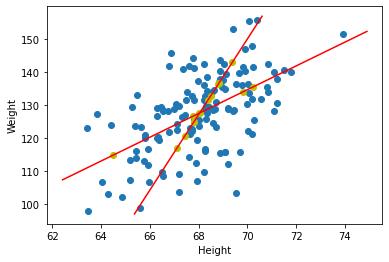

In [13]:
outlier_height = outlier["Height (Inches)"]
outlier_weight = outlier["Weight (Pounds)"]
plt.scatter(data.iloc[ :,2:3], data.iloc[ :,3:4])  # plot normal data
plt.plot(px,py,color='r') #plot linear regression model for weight
plt.plot(py_height, px_height, color='r') #plot linear regression model for height
plt.scatter(outlier_height, outlier_weight, color='y') # plot replacedd data

plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/RL_Sutton/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


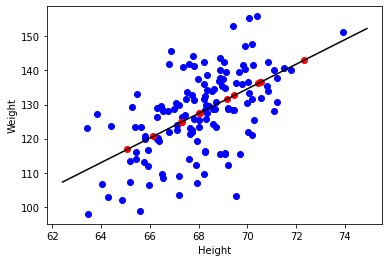

[[62.42577]
 [74.90107]]
[[107.25212892]
 [152.29227905]]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('../dataset/bmi_data_lab3.csv')

h_min = 60
h_max = 75
w_min = 90
w_max = 220
df.loc[ (df['Height (Inches)'] < h_min) | (df['Height (Inches)'] > h_max),'Height (Inches)'] = np.NaN   # change the outlier to NAN
h_outlier = df[df['Height (Inches)'].isnull()].copy()
df.loc[ (df['Weight (Pounds)'] < w_min) | (df['Weight (Pounds)'] > w_max), 'Weight (Pounds)'] = np.NaN # change the outlier to NAN
w_outlier = df[df['Weight (Pounds)'].isnull()].copy()

data = df[~(df['Height (Inches)'].isnull() | df['Weight (Pounds)'].isnull())].copy()
reg = linear_model.LinearRegression()
reg = reg.fit(data.iloc[ :,2:3], data.iloc[ :,3:4])

px = np.array([  (data.iloc[ :,2:3].min()-1) , (data.iloc[ :,2:3].max()+1)     ])
py = reg.predict(px)

h_outlier['Height (Inches)'] = np.array(h_outlier['Weight (Pounds)']-reg.intercept_)/reg.coef_[0]
w_outlier['Height (Inches)'] = np.array(w_outlier['Weight (Pounds)']*reg.coef_[0] + reg.intercept_)

plt.scatter(data.iloc[ :,2:3], data.iloc[ :,3:4], c="blue")
plt.scatter(h_outlier.iloc[ :,2:3], h_outlier.iloc[ :,3:4], c="red")
plt.scatter(w_outlier.iloc[ :,2:3], w_outlier.iloc[ :,3:4], c="red")
plt.plot(px,py,color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

print(px)
print(py)
